# Airbnb Revenue Analysis

**By: Jeffrey Fernandez, Ishika Kataria, Natalia Shamoon, Jay Chang, Jack Keaveny**

There has been a recent influx of clients interested in entering the short-term rental market, specifically through touristic Airbnb properties. Some motivations for entering this new market is as follows:
*   People spent $4.72 trillion on leisure tourism in 2019.

*   Considering a booking value of $38 billion in 2019 for Airbnb, the market share was only 0.8% of that market.
*   As of 2024, Airbnb has over 8 million active listings spanning 220
countries.

*   Since its launch, hosts have earned over $250 billion through Airbnb.
*   Airbnb has more than 200 million active users worldwide.

*   In 2023, the average host in the U.S. earned $14,000 from Airbnb.
*   The United States has the highest number of Airbnb listings, featuring
around 2.25 million active properties.


Considering the overall success in the U.S, our clients have tasked our consulting agency with providing actionable investment recommendations specifically for Spain, a popular tourist destination. Primarily, we will identify which key property attributes maximize profitability, guiding our clients in making informed decisions about where and how to invest. We will focus on utilizing data from 2024.

Our action plan is as follows:


1.   Determine the best city to invest in within Spain
2.   Identify the best property types to invest in
3.   Determine what property attributes influence revenue the most
4.   Create models that predict which variables influence revenue the most



The final deliverable will be a clear, data-driven presentation outlining the most lucrative opportunities and strategic insights for navigating the competitive landscape of short-term rentals.


---



# Loading, Cleaning, and Filtering the Data

Before being able to answer the request, we must implement all the necessary preparations and work.

This includes loading the datasets and simultaneously cleaning and filtering the data to account for any errors, inconsistencies, or bias.

## Loading the Data

In [ ]:
#Mounting Drive to be able to access Files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np

#Linking folder to variable
Airbnb_dir = '/content/drive/MyDrive/Final_Project_work/Final_Project/Spain'
dataframes = {} #creating empty dictionary



# loop itterates through folder of cities in apsin with their Airbnb data making each city a key pointing to a
# list of 3 data frames: listings, reviews, and calendar

for foldername in os.listdir(Airbnb_dir):
  folder_path = os.path.join(Airbnb_dir, foldername)
  key = foldername
  dataframes[key] = []
  if not os.path.exists(folder_path):
    print(f"Error: Directory '{folder_path}' not found.")
  else:
    for filename in os.listdir(folder_path):
      if filename.endswith(".csv.gz"):
        filepath = os.path.join(folder_path, filename)
        try:
          df = pd.read_csv(filepath)
          print(f"DataFrame created for: {foldername}, {filename}")

          # add dataframe to dict
          dataframes[key].append(df)


        except pd.errors.ParserError as e:
          print(f"Error parsing {filename}: {e}")
        except Exception as e:
          print(f"An error occurred while processing {filename}: {e}")
      else:
        print(f"Skipping non-CSV.gz file: {filename}")

    print("-" * 20)





DataFrame created for: Madrid, listings.csv.gz
DataFrame created for: Madrid, calendar.csv.gz
Skipping non-CSV.gz file: listings.csv
DataFrame created for: Madrid, reviews.csv.gz
Skipping non-CSV.gz file: reviews.csv
Skipping non-CSV.gz file: neighbourhoods.csv
Skipping non-CSV.gz file: neighbourhoods.geojson
--------------------
DataFrame created for: Mallorca, listings.csv.gz


<ipython-input-2-9501e0219e33>:25: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


DataFrame created for: Mallorca, calendar.csv.gz
Skipping non-CSV.gz file: listings.csv
DataFrame created for: Mallorca, reviews.csv.gz
Skipping non-CSV.gz file: reviews.csv
Skipping non-CSV.gz file: neighbourhoods.csv
Skipping non-CSV.gz file: neighbourhoods.geojson
--------------------
DataFrame created for: Barcelona, listings.csv.gz


<ipython-input-2-9501e0219e33>:25: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


DataFrame created for: Barcelona, calendar.csv.gz
Skipping non-CSV.gz file: listings.csv
DataFrame created for: Barcelona, reviews.csv.gz
Skipping non-CSV.gz file: reviews.csv
Skipping non-CSV.gz file: neighbourhoods.csv
Skipping non-CSV.gz file: neighbourhoods.geojson
--------------------
DataFrame created for: Menorca, listings.csv.gz


<ipython-input-2-9501e0219e33>:25: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


DataFrame created for: Menorca, calendar.csv.gz
DataFrame created for: Menorca, reviews.csv.gz
Skipping non-CSV.gz file: listings.csv
Skipping non-CSV.gz file: reviews.csv
Skipping non-CSV.gz file: neighbourhoods.csv
Skipping non-CSV.gz file: neighbourhoods.geojson
--------------------
DataFrame created for: Malaga, listings.csv.gz
DataFrame created for: Malaga, calendar.csv.gz
DataFrame created for: Malaga, reviews.csv.gz
Skipping non-CSV.gz file: listings.csv
Skipping non-CSV.gz file: reviews.csv
Skipping non-CSV.gz file: neighbourhoods.csv
Skipping non-CSV.gz file: neighbourhoods.geojson
--------------------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#showing off Dictionary Keys
dataframes.keys()

dict_keys(['Madrid', 'Mallorca', 'Barcelona', 'Menorca', 'Malaga'])

In [ ]:
import pandas as pd

listings = pd.DataFrame()
calendar = pd.DataFrame()
reviews = pd.DataFrame()

for key, value in dataframes.items():
  if value and isinstance(value[0], pd.DataFrame):  # Check if the list is not empty and contains a DataFrame
    df = value[0].copy()
    df['city'] = key  #add a column to tell which key the row came from
    listings = pd.concat([listings, df], ignore_index=True)

for key, value in dataframes.items():
  if value and isinstance(value[1], pd.DataFrame):  # Check if the list is not empty and contains a DataFrame
    df = value[1].copy()
    df['city'] = key  #add a column to tell which key the row came from
    calendar = pd.concat([calendar, df], ignore_index=True)


for key, value in dataframes.items():
  if value and isinstance(value[2], pd.DataFrame):  # Check if the list is not empty and contains a DataFrame
    df = value[2].copy()
    df['city'] = key  #add a column to tell which key the row came from
    reviews = pd.concat([reviews, df], ignore_index=True)




## Cleaning and Filtering

Now that our data is loaded and the respective dataframes are created, we can start cleaning and filtering our data.

In [ ]:

#list of columns deemed unnecessary in Listings dataframe
useless_col = [
               'source',
               'listing_url',
               'scrape_id',
               'last_scraped',
               'name',
               'picture_url',
               'host_id',
               'host_url',
               'host_name',
               'host_since',
               'host_location',
               'host_about',
               'host_thumbnail_url',
               'host_picture_url' ,
               'host_neighbourhood',
               'host_listings_count' ,
               'host_total_listings_count',
               'host_has_profile_pic',
               'host_identity_verified',
               'latitude',
               'longitude',
               'minimum_minimum_nights',
               'maximum_minimum_nights',
               'minimum_maximum_nights',
               'maximum_maximum_nights',
               'minimum_nights_avg_ntm',
               'maximum_nights_avg_ntm',
               'calendar_updated',
               'calendar_last_scraped',
               'availability_30',
               'availability_60',
               'availability_90',
               'first_review',
               'license',
               'instant_bookable',
               'neighbourhood', #the cleansed is better
               'neighborhood_overview',
               'neighbourhood_group_cleansed', #removed cause Mallorca,Menorca, and Malaga have no values in this column
               'has_availability'
]


#dropping useless columns:
listings2 = listings.drop(columns=useless_col, errors='ignore')

#remove rows with na values from listings 2
listings2 = listings2.dropna()

# Convert 'price' column to numeric, handling errors
listings2['price'] = listings2['price'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)

# Convert percentage strings to decimal floats for specified columns
for col in ['host_response_rate', 'host_acceptance_rate']:
    if col in listings2.columns:
        listings2[col] = pd.to_numeric(listings2[col].str.rstrip('%'), errors='coerce') / 100

# Filter listings2 based on specified criteria
listings2 = listings2[
    (listings2['price'] >= 5) &
    (listings2['price'] <= 9999) &
    (listings2['reviews_per_month'] <= 40) &
    (listings2['minimum_nights'] <= 365) &
    (listings2['beds'] > 0)
]

# Reset the index of the filtered DataFrame
listings2 = listings2.reset_index(drop=True)

<ipython-input-6-0959927b3a57>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings2['price'] = listings2['price'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
<ipython-input-6-0959927b3a57>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings2[col] = pd.to_numeric(listings2[col].str.rstrip('%'), errors='coerce') / 100


Here, we have simply filtered out unnecesary and redundant columns, as well as removing rows with "na" values from our dataframe "listings2". Additionally, we have set boundaries for specific variables

In [ ]:
# doing the same for Reviews and Calendar(no real filtering or extensive cleaning needed)

rev_useless = ['id', 'reviewer_id', 'reviewer_name']
reviews2 = reviews.drop(columns=rev_useless, errors='ignore')

cal_useless = ['minimum_nights', 'maximum_nights', 'adjusted_price' ]
calendar2 = calendar.drop(columns=cal_useless, errors='ignore')

In [ ]:
listings2.describe(include=[np.number])

,id,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.640500e+04,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,...,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000,46405.000000
mean,4.411750e+17,0.961762,0.915048,4.217369,1.574604,1.953022,2.926236,201.751234,5.854929,590.056309,...,4.656717,4.749452,4.747081,4.729160,4.526485,46.427497,44.040039,2.289969,0.076134,1.513234
std,4.757052e+17,0.124220,0.178492,2.416641,0.955221,1.291442,2.091047,454.597958,12.360311,445.715928,...,0.445765,0.410848,0.431972,0.362606,0.492442,116.418354,115.498868,16.551036,1.087084,1.766894
min,1.867400e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.888433e+07,0.980000,0.940000,2.000000,1.000000,1.000000,1.000000,86.000000,1.000000,330.000000,...,4.540000,4.690000,4.690000,4.640000,4.400000,2.000000,1.000000,0.000000,0.000000,0.330000
50%,5.339035e+07,1.000000,0.990000,4.000000,1.000000,2.000000,2.000000,140.000000,2.000000,365.000000,...,4.780000,4.870000,4.880000,4.830000,4.640000,6.000000,4.000000,0.000000,0.000000,0.910000
75%,9.159319e+17,1.000000,1.000000,6.000000,2.000000,3.000000,4.000000,222.000000,4.000000,1125.000000,...,4.940000,5.000000,5.000000,4.960000,4.810000,37.000000,35.000000,1.000000,0.000000,2.120000
max,1.240331e+18,1.000000,1.000000,16.000000,19.000000,25.000000,40.000000,9999.000000,365.000000,1125.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,838.000000,835.000000,356.000000,26.000000,36.970000


In [ ]:
listings2.describe(include=['object', 'category'])

,description,host_response_time,host_is_superhost,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,last_review,city
count,46405,46405,46405,46405,46405,46405,46405,46405,46405,46405,46405
unique,41706,4,2,6,268,79,4,46,43294,1518,5
top,"Enjoy the simplicity of this quiet, central home.",within an hour,f,"['email', 'phone']",Centro,Entire rental unit,Entire home/apt,1 bath,"[""Heating"", ""Hair dryer"", ""Toaster"", ""TV"", ""Ho...",2024-09-08,Madrid
freq,116,37107,32625,35987,4233,23460,37261,21474,67,955,14902


In [ ]:
#Encoding for certain categorical variables to numerical

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding on host_is_super_host and host_response_time
categories = [
    ["t", "f"],
    ['within an hour', 'within a few hours', 'within a day', 'a few days or more']
]

encoder = OrdinalEncoder(categories=categories)

listings2[['host_is_superhost', 'host_response_time']] = encoder.fit_transform(
    listings2[['host_is_superhost', 'host_response_time']]
              )

# One-Hot encoding on Nominal Data
listings2 = pd.get_dummies(listings2, columns=['room_type'],
                           prefix=['room_type'],
                          drop_first=True)

# turning true and falses in encoded room types to 0 and 1
for col in listings2.filter(like='room_type_').columns:
    listings2[col] = listings2[col].astype(int)


In [ ]:
#one hot encode 'city' in listings2 as type int

# One-hot encode 'city' column in listings2
listings2 = pd.get_dummies(listings2, columns=['city'], prefix='city', drop_first=True)

# Convert one-hot encoded columns to integers
for col in listings2.filter(like='city_').columns:
    listings2[col] = listings2[col].astype(int)

In [ ]:
#list all variables in listings2 and types

import pandas as pd
import numpy as np

# Assuming 'listings2' is already defined as in your provided code.

# Get a list of all variables in listings2 and their types.
variable_types = listings2.dtypes

# Print the variables and their types.
for variable, var_type in variable_types.items():
  print(f"Variable: {variable}, Type: {var_type}")

Variable: id, Type: int64
Variable: description, Type: object
Variable: host_response_time, Type: float64
Variable: host_response_rate, Type: float64
Variable: host_acceptance_rate, Type: float64
Variable: host_is_superhost, Type: float64
Variable: host_verifications, Type: object
Variable: neighbourhood_cleansed, Type: object
Variable: property_type, Type: object
Variable: accommodates, Type: int64
Variable: bathrooms, Type: float64
Variable: bathrooms_text, Type: object
Variable: bedrooms, Type: float64
Variable: beds, Type: float64
Variable: amenities, Type: object
Variable: price, Type: float64
Variable: minimum_nights, Type: int64
Variable: maximum_nights, Type: int64
Variable: availability_365, Type: int64
Variable: number_of_reviews, Type: int64
Variable: number_of_reviews_ltm, Type: int64
Variable: number_of_reviews_l30d, Type: int64
Variable: last_review, Type: object
Variable: review_scores_rating, Type: float64
Variable: review_scores_accuracy, Type: float64
Variable: review

In [ ]:
calendar2['date'] = pd.to_datetime(calendar2['date'])
calendar2['year'] = calendar2['date'].dt.year
calendar2['month'] = calendar2['date'].dt.month
calendar2['day'] = calendar2['date'].dt.day

# Visualizing the Data

With our data loaded, cleaned, and filtered, we can now visualize our data to have a better sense of how certain variables correlate with each other.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

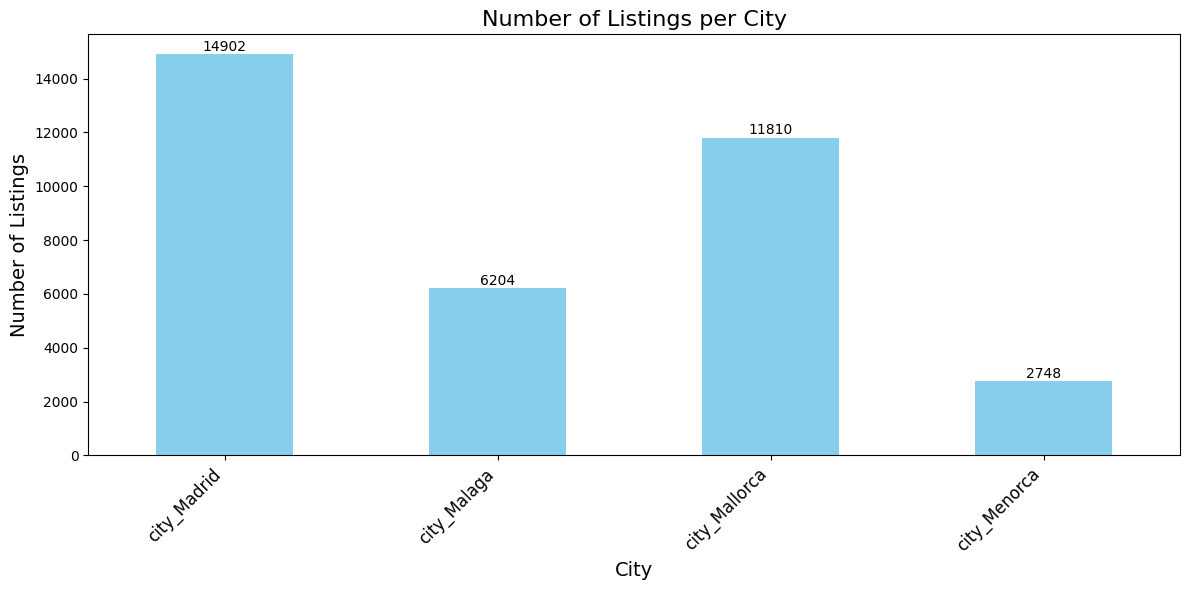

In [ ]:

# Create a bar graph for the city dummy variables
city_columns = listings2.filter(like='city_').columns
city_counts = listings2[city_columns].sum()

plt.figure(figsize=(12, 6))
bars = city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Listings per City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Annotate the bars with their values
for i, v in enumerate(city_counts):
    plt.text(i, v + 10, str(int(v)), ha='center', va='bottom', fontsize=10)

plt.show()

Here, we have created a bar graph of the number of listings per city, which can help us determine which city in Spain is the best to invest in. Although it won't tell us exactly which one's are more profitable than others, it does shed light on which cities have the most properties, and in turn, which cities are the most "popular" to visit, possibly translating to profitability. However, we will explore this further.


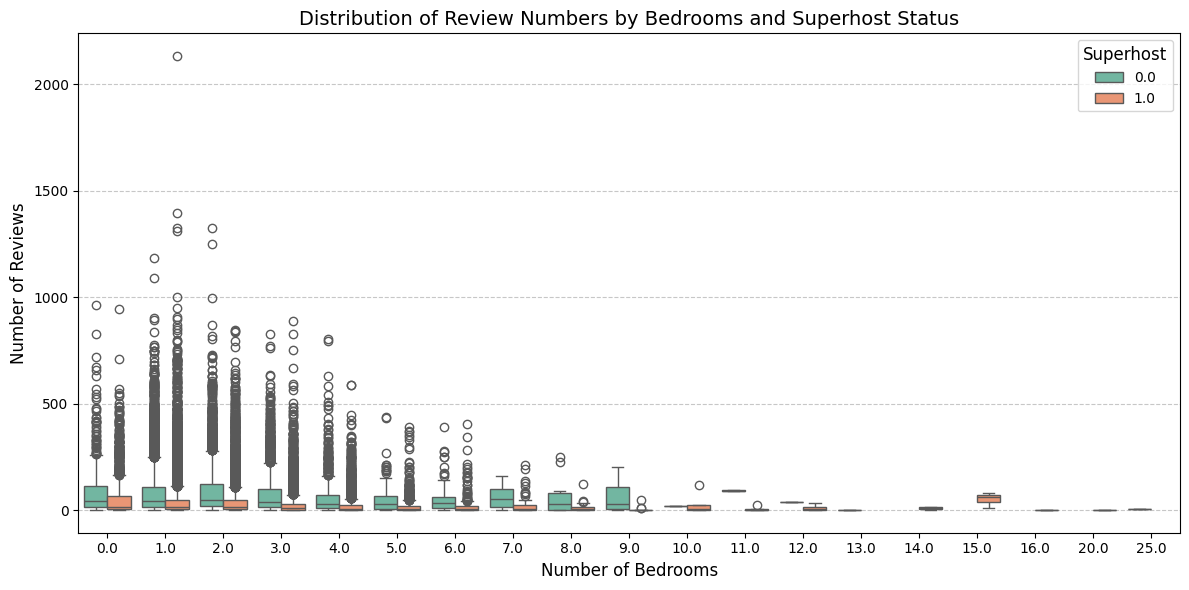

In [ ]:
#Box Plot: Reviews by Bedrooms and Superhost Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=listings2, x='bedrooms', y='number_of_reviews', hue='host_is_superhost', palette='Set2')
plt.title('Distribution of Review Numbers by Bedrooms and Superhost Status', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Superhost', title_fontsize=12, fontsize=10, loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now we have created a box plot of the number of reviews based on the number of bedrooms, taking into account of the Superhost status. At first glance, the data looks right skewed where there are a lot more reviews for properties with lower amounts of bedrooms, and a lot fewer reviews for properties with a higher number of bedrooms. Although this could point to properties with a lower number of bedrooms having more reviews (and in turn, possibly being more profitable and "popular" for consumers), the skewed data could be attributed to the popularity and prevalence of properties with a lower number of bedrooms, rather than signs of profitability. However, we will examine this further in our analysis and predictive model.


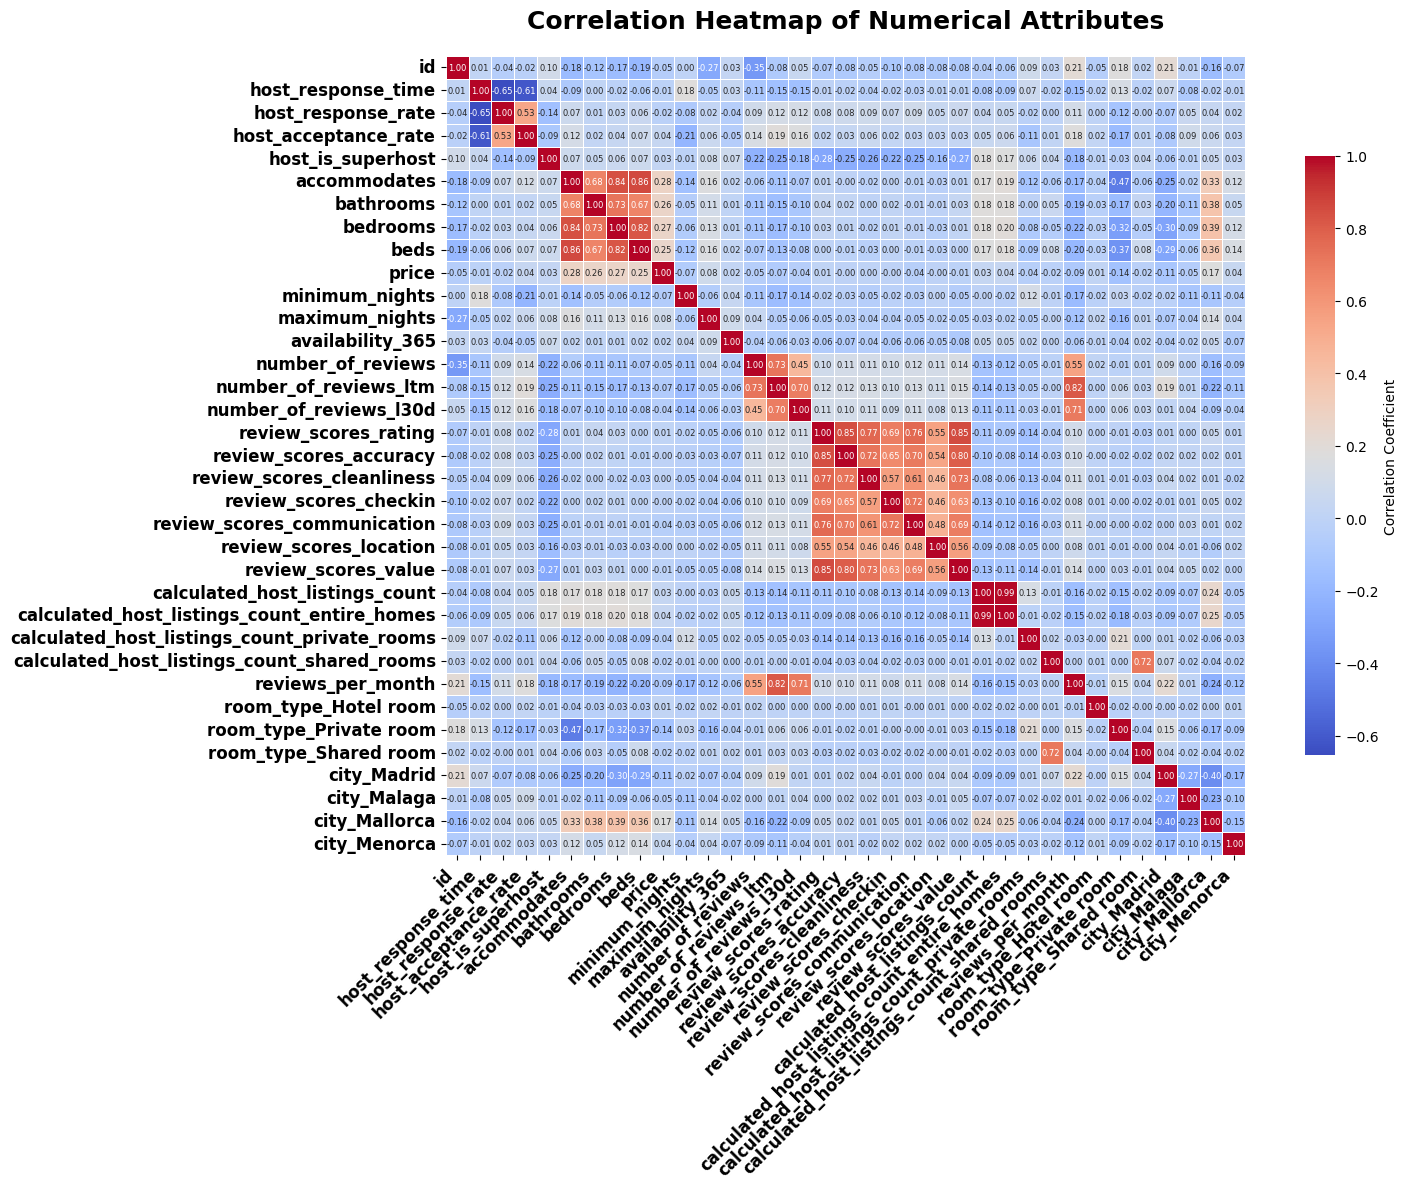

In [ ]:
#Correlation matrix

# Calculate the correlation matrix for numerical attributes
numerical_attributes = listings2.select_dtypes(include=np.number)
correlation_matrix = numerical_attributes.corr()



plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # Reverted to the original color scheme
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 6},  # Further reduced annotation font size
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"},
    square=True
)
plt.title('Correlation Heatmap of Numerical Attributes', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Variable Creation: Calculating Revenue

With our visualizations done, we must now calculate the revenue, an integral part of our property attribute analysis. To do this, we will multiply the price by the number of bookings (or rather number of days NOT available in availability_365) per property in 2024. Although the values of revenue that we calculate don't factor in hidden costs (% that AirBnB takes, maintenance, etc.), it is still a viable estimate of the revenue and a strong indicator of profitability.

In [ ]:
#2024 revenue calculations for unique listings
data_2024_unfiltered = calendar2[calendar2['year'] == 2024]
data_2024 = data_2024_unfiltered[data_2024_unfiltered['listing_id'].isin(listings2['id'])]
data_2024['price'] = data_2024['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data_2024['available'] = data_2024['available'].map({'f': False, 't': True})
booked_days = data_2024[data_2024['available'] == False]
revenue_by_property = booked_days.groupby('listing_id')['price'].sum().reset_index(name='2024_revenue')

<ipython-input-18-193aa3f6c2aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['price'] = data_2024['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
<ipython-input-18-193aa3f6c2aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['available'] = data_2024['available'].map({'f': False, 't': True})


In [ ]:
# Check if every unique listing_id in revenue_by_property exists in listings2['id']
missing_listings = set(revenue_by_property['listing_id']) - set(listings2['id'])

if missing_listings:
    print("The following listing IDs from revenue_by_property are not found in listings2:")
    print(missing_listings)
else:
    print("All listing IDs in revenue_by_property are present in listings2.")

All listing IDs in revenue_by_property are present in listings2.


In [ ]:

# Merge the revenue data with listings2
listings2 = pd.merge(listings2, revenue_by_property, left_on='id', right_on='listing_id', how='left')

# Drop the extra 'listing_id' column
#listings2 = listings2.drop('listing_id', axis=1)

In [ ]:

listings2.select_dtypes(include=['object', 'category']).columns.tolist()

['description',
 'host_verifications',
 'neighbourhood_cleansed',
 'property_type',
 'bathrooms_text',
 'amenities',
 'last_review']

In [ ]:

for col in listings2.select_dtypes(include=['object', 'category']).columns.tolist():
  print(f"Unique values for {col}:")
  print(listings2[col].unique())
  print("-" * 20)

Unique values for description:
["Charming 40m2 flat in the central neighbourhood of Malasaña. Comfortable and cosy, it can accommodate up to 4 people in its 2 independent bedrooms with double beds. With excellent natural light as it is exterior. It has a full bathroom with shower. Includes wifi connection, coffee machine, bed linen and towels. For more details, please see the full description below, don't hesitate to ask!"
 'Enjoy a luxury experience in this central accommodation *DE 29 MTS2.'
 'Malasaña is a dynamic student area with cafes, bakeries and vintage clothing stores. The gastronomic offer of the neighborhood is very complete and varied. We can find numerous classic taverns where you can enjoy a refreshing beer accompanied by your usual tapa. The terraces are another of the protagonists of this area. In the evening, live bands and DJs perform in trendy dance and rock music venues.'
 ...
 "A beautiful apartment very close to the beach, just a 2 minute walk, quiet and with gre

In [ ]:

# Display observations in listings2 with NA for 2024_revenue
listings2[listings2['2024_revenue'].isna()]

,id,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,neighbourhood_cleansed,property_type,accommodates,...,reviews_per_month,room_type_Hotel room,room_type_Private room,room_type_Shared room,city_Madrid,city_Malaga,city_Mallorca,city_Menorca,listing_id,2024_revenue
34,1086253821003841243,GREAT GARDEN AND POOL FLOOR!<br />It has radia...,1.0,0.94,0.55,1.0,"['email', 'phone']",San Pascual,Entire rental unit,2,...,0.18,0,0,0,1,0,0,0,NaN,NaN
62,1173774357588030568,Your family will have everything just a stone'...,0.0,1.00,0.83,1.0,"['email', 'phone']",Guindalera,Entire rental unit,4,...,1.34,0,0,0,1,0,0,0,NaN,NaN
105,5897565,Gran vía is the oldest y avenue in Madrid.<br ...,0.0,1.00,0.86,1.0,"['email', 'phone']",Cortes,Private room in rental unit,6,...,0.15,0,1,0,1,0,0,0,NaN,NaN
116,729645395352577944,Enjoy the simplicity of this quiet and central...,0.0,1.00,0.56,1.0,"['email', 'phone', 'work_email']",Trafalgar,Private room in rental unit,2,...,0.51,0,1,0,1,0,0,0,NaN,NaN
118,1071609701258762364,Tour the most popular shops and restaurants fr...,0.0,1.00,0.79,1.0,"['email', 'phone']",Acacias,Shared room in bed and breakfast,1,...,1.29,0,0,1,1,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46240,42238940,"Spacious duplex in main floor kitchen, living ...",0.0,0.98,1.00,1.0,"['email', 'phone', 'work_email']",Centro,Entire rental unit,2,...,0.27,0,0,0,0,1,0,0,NaN,NaN
46254,50837184,"New and decorated studios, fully equipped and ...",0.0,0.98,1.00,1.0,"['email', 'phone', 'work_email']",Centro,Room in aparthotel,4,...,2.68,0,1,0,0,1,0,0,NaN,NaN
46349,41918863,Apartment located in a very family-friendly ar...,0.0,0.98,1.00,1.0,"['email', 'phone', 'work_email']",Cruz De Humilladero,Entire rental unit,6,...,0.57,0,0,0,0,1,0,0,NaN,NaN
46391,41547027,Modern 1 bedroom apartment with swimming pool ...,0.0,0.98,1.00,1.0,"['email', 'phone', 'work_email']",Cruz De Humilladero,Entire rental unit,4,...,0.52,0,0,0,0,1,0,0,NaN,NaN


In [ ]:

# Count the number of observations with 2024_revenue = NA
na_revenue_count = revenue_by_property['2024_revenue'].isna().sum()
print(f"Number of observations with 2024_revenue = NA: {na_revenue_count}")

Number of observations with 2024_revenue = NA: 0


In [ ]:

# Count unique 'id' in listings2
unique_listings2_id = listings2['id'].nunique()
print(f"Number of unique 'id' in listings2: {unique_listings2_id}")

# Count unique 'listing_id' in revenue_by_property
unique_revenue_listing_id = revenue_by_property['listing_id'].nunique()
print(f"Number of unique 'listing_id' in revenue_by_property: {unique_revenue_listing_id}")

Number of unique 'id' in listings2: 46405
Number of unique 'listing_id' in revenue_by_property: 45790


In [ ]:

na_count = listings2['2024_revenue'].isna().sum()
print(f"Number of NA values in '2024_revenue': {na_count}")

Number of NA values in '2024_revenue': 615


We've figured out that there are more observations within our listings2 than in our calendar data, leaving us with 615 NA values for our target variable, 2024_revenue. We've decided to get rid of all observations with NA values, since they will simply not be useful to us in the modeling process. We could also change all of these values to 0, but this would skew lots of our statistics in a way that we don't want.

In [ ]:
# Drop rows with NA values in the '2024_revenue' column
listings2 = listings2.dropna(subset=['2024_revenue'])

# Reset the index after dropping rows
listings2 = listings2.reset_index(drop=True)

In [ ]:

import numpy as np

# Assuming 'listings2' DataFrame is already defined as in your provided code.

# Log transform the '2024_revenue' column to account for the large amount of variance
listings2['log_2024_revenue'] = np.log1p(listings2['2024_revenue'])

# Display the first few rows to verify the transformation
print(listings2[['2024_revenue', 'log_2024_revenue']].head())

   2024_revenue  log_2024_revenue
0       14687.0          9.594786
1        9248.0          9.132271
2        5412.0          8.596559
3        8140.0          9.004668
4        1160.0          7.057037


# Model Creation

Now, with all the data in order and all the necessary variables created,  we can start with our model creation. Our decision for which models to use will be explained below.

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Define features (X) and target (y)
X = listings2.select_dtypes(include=np.number).drop(['id', '2024_revenue', 'listing_id', 'number_of_reviews', 'number_of_reviews_l30d',
                                                     'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'log_2024_revenue', 'price', 'availability_365'], axis=1, errors='ignore')
y = listings2['log_2024_revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


def print_metrics(model_name, y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)

  print(f"{model_name} Metrics:")
  print(f"Mean Squared Error: {mse:.2f}")
  print(f"Root Mean Squared Error: {rmse:.2f}")
  print(f"R-squared: {r2:.2f}")
  print(f"Mean Absolute Error: {mae:.2f}")
  print("-" * 20)


print_metrics("Decision Tree", y_test, dt_predictions)
print_metrics("Random Forest", y_test, rf_predictions)

Decision Tree Metrics:
Mean Squared Error: 1.63
Root Mean Squared Error: 1.28
R-squared: 0.01
Mean Absolute Error: 0.91
--------------------
Random Forest Metrics:
Mean Squared Error: 0.78
Root Mean Squared Error: 0.88
R-squared: 0.52
Mean Absolute Error: 0.63
--------------------


## Model Comparison and Analysis

**Random Forest vs Decision Tree**



Based on the provided evaluation metrics, the Random Forest Regression model outperforms the Decision Tree Regression model in predicting Airbnb revenue.The Random Forest demonstrates significantly higher R-squared, lower Mean Squared Error, and lower Mean Absolute Error, indicating better predictive accuracy and a stronger ability to capture the underlying patterns in the data.

However, the Decision Tree model offers simplicity and interpretability. Thus, we prioritize the Decision Tree model for feature analysis due to its enhanced interpretability. Decision Trees provide a more transparent view of how individual features contribute to the final prediction, enabling a clearer understanding of their relative importance in determining Airbnb revenue. This insight is invaluable for identifying key factors that influence revenue and informing targeted strategies for optimization.





We chose to exclude `price` and `availability_365` as features in the model because their inclusion significantly impacted our ability to analyze the relationship between other features and revenue in 2024. Both `price` and `availability_365` are directly involved in the calculation of revenue (`revenue = price * booked days`), which makes them highly correlated with the target variable. Their dominant influence on the model confounded the effects of other important predictors, such as property characteristics, host behaviors, and review metrics. By removing these features, we ensured a more balanced evaluation of the remaining variables. This allowed the model to better assess the characteristics affecting revenue without these two factors skewing the results. This approach provided clearer insights into how other features, like the number of bedrooms, bathrooms, and location, contribute to the financial performance of Airbnb properties.

Most Important Features:
                                         Feature  Importance
18                calculated_host_listings_count    0.116888
22                        room_type_Private room    0.100459
5                                      bathrooms    0.062410
6                                       bedrooms    0.059465
2                           host_acceptance_rate    0.057918
10                         number_of_reviews_ltm    0.054585
16                        review_scores_location    0.048687
8                                 minimum_nights    0.045484
17                           review_scores_value    0.043660
9                                 maximum_nights    0.040854
13                     review_scores_cleanliness    0.038743
1                             host_response_rate    0.036629
14                         review_scores_checkin    0.035947
15                   review_scores_communication    0.035771
12                        review_scores_accuracy    0.035016

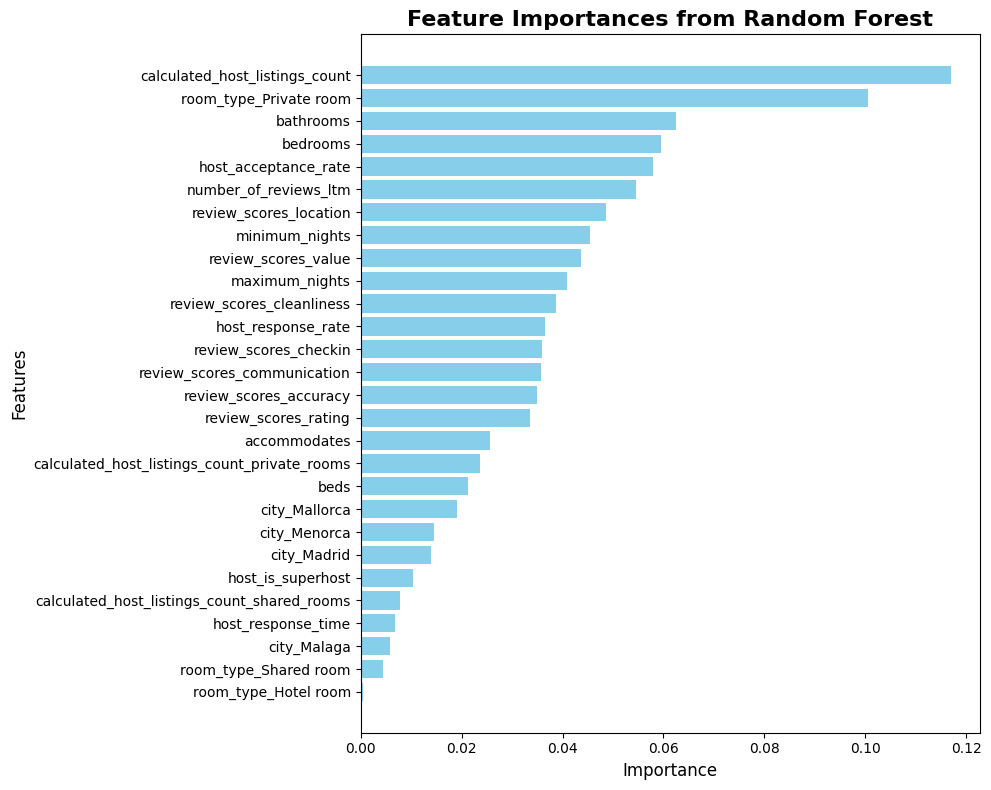

In [ ]:
import pandas as pd

# Extract feature importances
importances = rf_model.feature_importances_  # Assuming rf_model is your Random Forest model
feature_names = X_test.columns  # Assuming X_test is your feature set

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Most Important Features:")
print(feature_importances)

# Plotting the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances from Random Forest', fontsize=16, weight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()
plt.show()

The analysis of feature importance reveals several key drivers of revenue for Airbnb properties. The top predictor, `calculated_host_listings_count`, highlights the advantage of managing multiple listings, suggesting that hosts with larger portfolios can generate higher revenues, likely due to economies of scale and increased booking opportunities. The second most important feature, `room_type_Private room`, emphasizes the importance of offering private accommodations, which are highly desirable among guests. Amenities such as `bathrooms` and `bedrooms` are also critical, underscoring the role of property size and comfort in driving bookings. Lastly, `host_acceptance_rate` indicates that proactive and responsive hosts tend to perform better, suggesting that guest satisfaction and engagement are vital for revenue generation. These insights collectively suggest that investors should focus on scalable portfolios, prioritize private accommodations with enhanced amenities, and encourage host responsiveness to maximize their returns.

Based on the random forest regression feature importance, we can pick out the top 5 most heavily weighted factors in a property's revenue. These are: "calculated_host_listings_count", "room_type_Private room", "bathrooms", "bedrooms", "host_acceptance_rate"

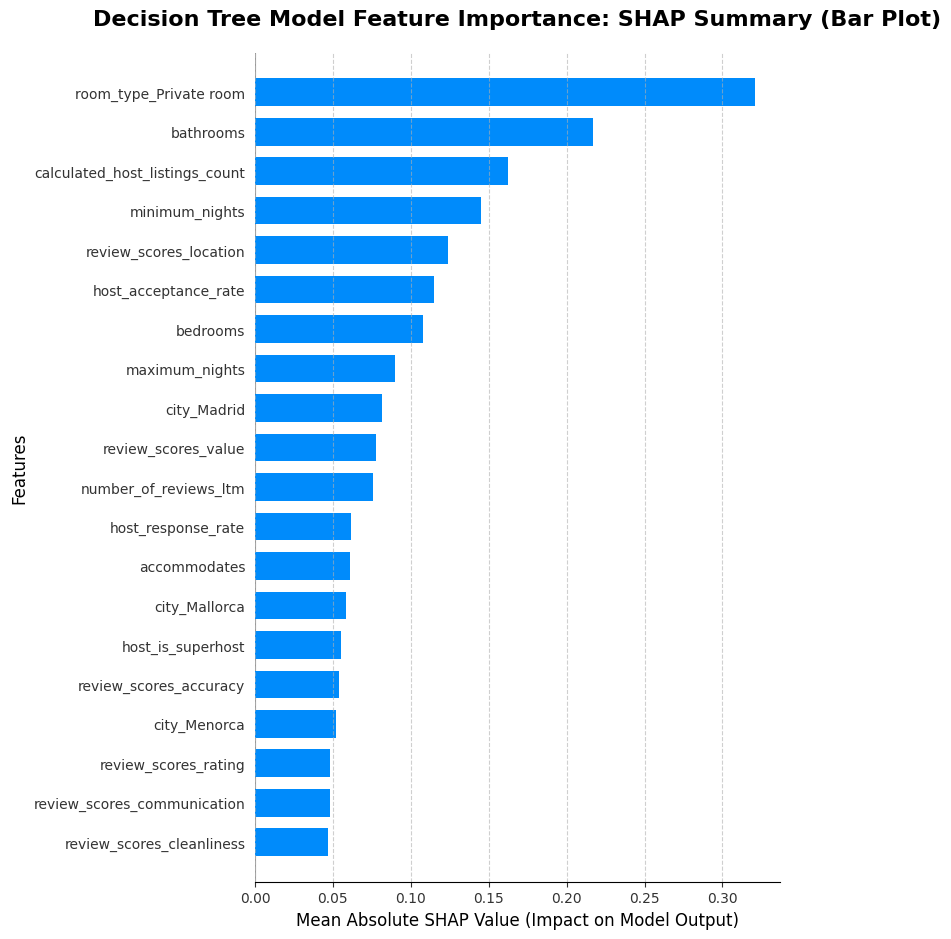

In [ ]:
import shap

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)

# Visualize the first prediction's explanation (using a force plot)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# Summarize the effects of all the features with enhancements
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)  # Suppress automatic show to customize

# Adding title and labels
plt.title("Decision Tree Model Feature Importance: SHAP Summary (Bar Plot)", fontsize=16, weight='bold', pad=20)
plt.xlabel("Mean Absolute SHAP Value (Impact on Model Output)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Analysis of the SHAP plot reveals that property characteristics, particularly room type and bathroom count, are the most influential factors in determining Airbnb revenue. Positive guest reviews, especially for location and value, also play a significant role. Host factors like acceptance rate have some impact, while location-specific effects are evident, with properties in Madrid showing higher revenue potential. These findings suggest that optimizing property listings, setting competitive pricing, and maintaining high guest satisfaction are crucial strategies for maximizing revenue.

Based on the SHAP summary plot, we can pick out additional heavily weighted factors in a property's revenue. These are: "minimum_nights" and "review_scores_location"

Partial Dependence Plots (PDPs) show how the model's prediction changes as the value of a specific feature is varied while holding other features constant. In this Airbnb revenue analysis, we use PDPs to gain insights into how key property characteristics, such as number of bathrooms, minimum stay requirements, and guest review scores, influence the predicted revenue. This helps us identify which features have the strongest impact and understand the nature of their relationship with the target variable.

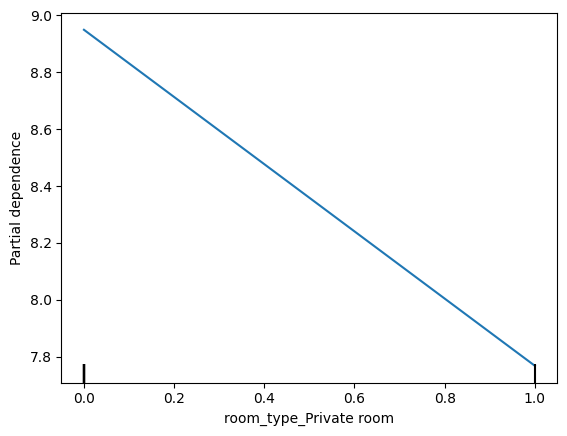

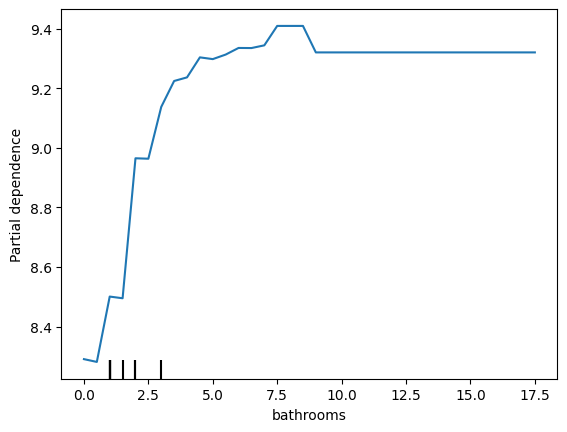

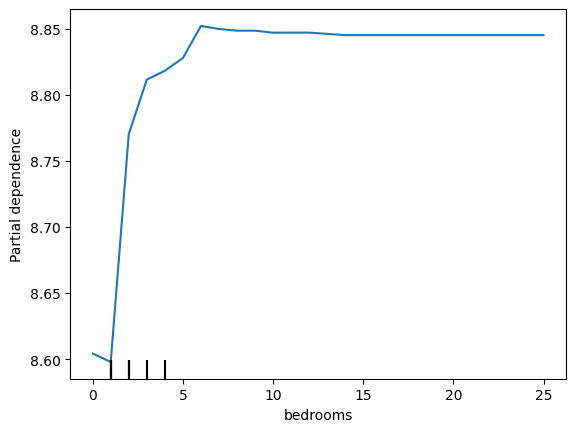

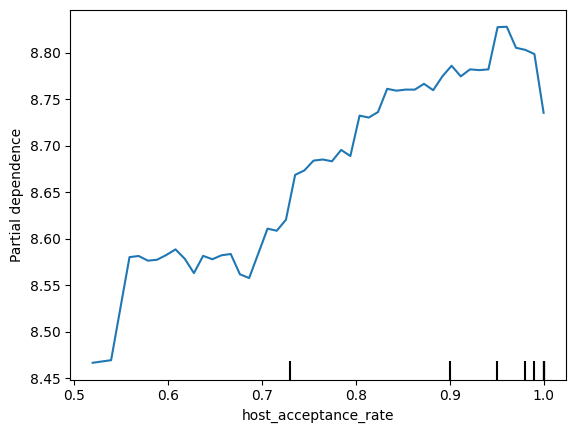

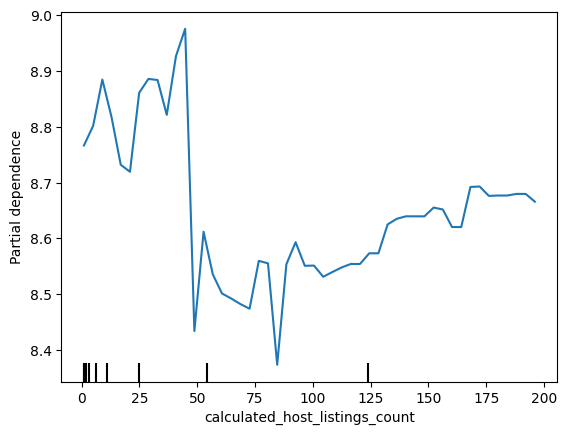

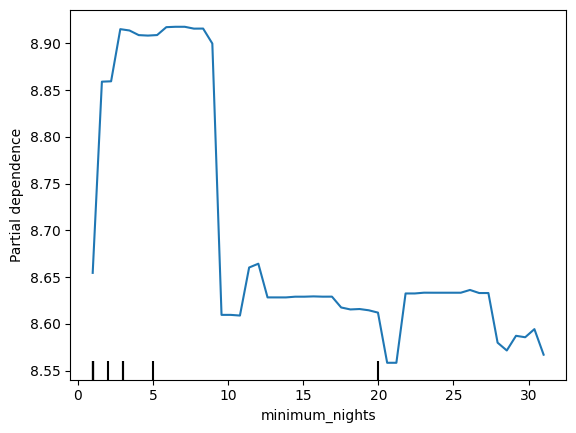

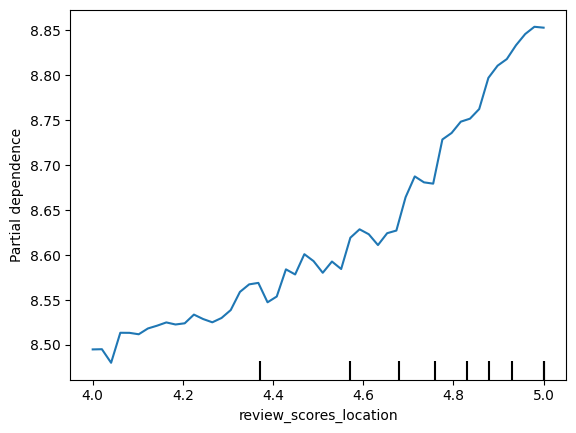

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
top_5_features = ["room_type_Private room", "bathrooms", "bedrooms", "host_acceptance_rate", "calculated_host_listings_count", "minimum_nights", "review_scores_location"]
for feature in top_5_features:
    PartialDependenceDisplay.from_estimator(dt_model, X_train, [feature], grid_resolution=50, feature_names=X_train.columns)

#Insights

**calculated_host_listings_count**

The PDP for "calculated_host_listings_count" reveals a complex non-linear relationship with the predicted outcome. While a moderate number of listings might be associated with higher revenue, likely due to factors like Superhost status and efficient management, an excessive number of listings can lead to fluctuations and even a decline in predicted revenue. This suggests that managing a large portfolio requires careful resource allocation and may face challenges related to maintaining high-quality service and managing competition in saturated markets.

**room_type_Private room**

The provided PDP for "room_type_Private room" suggests a negative association between this feature and the predicted outcome. On Airbnb, a "private room" refers to a room in a shared house or apartment where guests have their own space, but share common areas with the host or other guests. The PDP indicates that, based on the Decision Tree model, properties listed as "private rooms" might be associated with lower revenue or less favorable outcomes compared to other room types (eg, entire homes).

**bathrooms**

The PDP for "bathrooms" reveals a strong positive correlation with the predicted outcome, suggesting that properties with more bathrooms tend to have higher predicted revenue. This relationship exhibits diminishing returns, with the initial increase in revenue being more pronounced for the first few bathrooms. This finding aligns with the expectation that guests value convenience and privacy, and that properties with multiple bathrooms are likely to be more competitive and command higher prices in the market.

**bedrooms**

The partial dependence plot for `bedrooms` reveals that revenue increases sharply as the number of bedrooms rises from 0 to 5. This suggests that properties with more bedrooms are significantly more appealing to guests and command higher revenue. However, beyond 5 bedrooms, the curve flattens, indicating diminishing returns for additional bedrooms. Investors should prioritize properties with 2-5 bedrooms, as this range maximizes revenue potential without unnecessary overinvestment in excessively large properties.

**host_acceptance_rate**

The partial dependence plot for `host_acceptance_rate` shows a clear positive relationship with revenue. Revenue steadily increases as the acceptance rate rises, with notable improvements observed beyond a 70% acceptance rate. This indicates that hosts who are more responsive and accommodating to booking requests tend to generate higher revenue. The steep climb near the upper range (90-100%) suggests that maintaining a high acceptance rate is a critical factor in optimizing property performance. Investors should prioritize working with hosts who exhibit strong engagement and responsiveness, as these behaviors are strongly associated with higher profitability.

**minimum_nights**

The PDP for "minimum_nights" shows a complex non-linear relationship with the predicted outcome. While a moderate minimum stay requirement might be associated with higher revenue, very strict minimums (eg, exceeding 20 nights) appear to negatively impact the predicted outcome. This suggests that a balance is needed between ensuring longer stays and maintaining flexibility for guests.

**review_scores_location**

The PDP for "review_scores_location" reveals a strong positive correlation with the predicted outcome. This indicates that properties with higher location scores tend to have higher predicted revenue. This aligns with the expectation that guests value well-located properties and are willing to pay a premium for convenient access to amenities and attractions.

In [ ]:
import plotly.express as px

fig = px.box(listings2, x="room_type_Private room", y="bathrooms",
             labels={"room_type_Private room": "Private Room (0: No, 1: Yes)"})
fig.show()

The box plot reveals that private rooms generally have a lower average number of bathrooms compared to non-private rooms. The distribution of bathrooms for non-private rooms is also more variable, suggesting a wider range of property sizes and configurations within this category. These insights can inform pricing strategies, property management decisions, and an understanding of guest expectations for different room types.

#Conclusions
Based on the analysis conducted in this project, here are some key recommendations for Airbnb investors:

1. **Leverage Host Portfolio Size**: The number of properties a host manages (`calculated_host_listings_count`) is the strongest predictor of revenue. Hosts with larger portfolios tend to achieve higher revenues due to economies of scale. Investors should consider working with or becoming hosts who can effectively scale their property portfolios.

2. **Prioritize Properties with Multiple Bathrooms**: The number of bathrooms in a property remains a strong indicator of potential revenue. Investing in properties with more bathrooms, especially for non-private rooms, can significantly enhance revenue potential.

3. **Invest in Properties with 2-5 Bedrooms**: The number of bedrooms is another critical factor. Properties with 2-5 bedrooms offer the best balance between guest appeal and cost-effectiveness. Beyond five bedrooms, returns diminish, making mid-sized properties a more profitable choice.

4. **Encourage High Host Acceptance Rates**: Host responsiveness and willingness to accept bookings (`host_acceptance_rate`) strongly influence revenue. Investors should prioritize properties managed by highly engaged hosts with high acceptance rates or invest in host training to enhance engagement.

5. **Balance Private Rooms and Amenities**: While private rooms generally generate lower revenue compared to entire properties, adding features like multiple bathrooms or other amenities can increase their profitability. Investors should carefully consider this trade-off when making investment decisions.

6. **Optimize Minimum Stay Requirements**: Setting a moderate minimum stay requirement can positively impact revenue by attracting longer stays without deterring potential guests. Overly strict minimum stay policies may reduce booking rates.

7. **Focus on Location**: Properties located near popular amenities and attractions (`review_scores_location`) tend to generate higher revenue. Investors should prioritize acquiring or improving properties in prime locations to maximize returns.

8. **Support Host Engagement**: Hosts with moderate portfolios and strong engagement metrics, such as high response rates, perform better. Investors should provide tools, training, and support to improve host responsiveness and engagement to enhance property performance.

These insights provide a roadmap for Airbnb investors to optimize their strategies, focusing on scalable portfolios, well-located and well-amenitized properties, and host engagement for maximum returns.

